В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [2]:
df = pd.read_csv('cars.csv') 
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [3]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
# ?pd.DataFrame.info

In [4]:
df.info

<bound method DataFrame.info of     Car_ID     Brand          Model  Year  Kilometers_Driven Fuel_Type  \
0        1    Toyota        Corolla  2018              50000    Petrol   
1        2     Honda          Civic  2019              40000    Petrol   
2        3      Ford        Mustang  2017              20000    Petrol   
3        4    Maruti          Swift  2020              30000    Diesel   
4        5   Hyundai         Sonata  2016              60000    Diesel   
..     ...       ...            ...   ...                ...       ...   
95      96  Mercedes        C-Class  2019              22000    Diesel   
96      97    Toyota  Innova Crysta  2017              38000    Diesel   
97      98      Ford       EcoSport  2018              26000    Petrol   
98      99   Hyundai          Verna  2019              24000    Petrol   
99     100      Tata         Altroz  2020              18000    Petrol   

   Transmission Owner_Type  Mileage  Engine  Power  Seats    Price  
0        M

In [5]:
df.dtypes

Car_ID                int64
Brand                object
Model                object
Year                  int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owner_Type           object
Mileage               int64
Engine                int64
Power                 int64
Seats                 int64
Price                 int64
dtype: object

В наборі даних 8 числових і 5 категоріальних колонок з них:
- 2 бінарні (`Fuel_Type`, `Transmission`)
- 1 мультикатегоріальна (`Brand`)
- 1 колонкa, в якій можна встановити відношення порядку (`Owner_Type`)

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [6]:
X = df.drop('Price', axis=1)
y = df['Price'] 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12
)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [7]:
X_train_bin = X_train.copy()
X_test_bin = X_test.copy()

fuel_map = (X_train_bin['Fuel_Type'].value_counts().index[0], 
            X_train_bin['Fuel_Type'].value_counts().index[1])
X_train_bin['Fuel_Type'] = X_train_bin['Fuel_Type'].apply(lambda x: 1 if x == fuel_map[0] else 0)
X_test_bin['Fuel_Type'] = X_test_bin['Fuel_Type'].apply(lambda x: 1 if x == fuel_map[0] else 0)

trans_map = (X_train_bin['Transmission'].value_counts().index[0], 
             X_train_bin['Transmission'].value_counts().index[1])
X_train_bin['Transmission'] = X_train_bin['Transmission'].apply(lambda x: 1 if x == trans_map[0] else 0)
X_test_bin['Transmission'] = X_test_bin['Transmission'].apply(lambda x: 1 if x == trans_map[0] else 0)

In [8]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
brand_encoded_train = ohe.fit_transform(X_train_bin[['Brand']])
brand_encoded_test = ohe.transform(X_test_bin[['Brand']])

brand_encoded_cols = ohe.get_feature_names_out(['Brand'])

# датафрейм з новими колонками
brand_encoded_train_df = pd.DataFrame(brand_encoded_train, columns=brand_encoded_cols, index=X_train_bin.index)
brand_encoded_test_df = pd.DataFrame(brand_encoded_test, columns=brand_encoded_cols, index=X_test_bin.index)

X_train_encoded = pd.concat([X_train_bin.drop(columns=['Brand']), brand_encoded_train_df], axis=1)
X_test_encoded = pd.concat([X_test_bin.drop(columns=['Brand']), brand_encoded_test_df], axis=1)

In [9]:
ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train_encoded[['Owner_Type']])

X_train_encoded['Owner_Type_Codes'] = ordenc.transform(X_train_encoded[['Owner_Type']])
X_test_encoded['Owner_Type_Codes'] = ordenc.transform(X_test_encoded[['Owner_Type']])

Очікуваний результат після трансформацій:

In [10]:
pd.set_option('display.max_columns', 100)
display(X_train_encoded.head()), display(X_test_encoded.head())

,Car_ID,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
83,84,T-Roc,2019,22000,1,1,Second,18,1498,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,A5,2018,28000,0,1,First,17,1968,187,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,A6,2018,28000,1,1,First,15,1984,241,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Vento,2017,32000,1,0,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,GLC,2017,26000,1,1,Second,12,1991,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
17,18,Q3,2016,38000,1,1,Second,15,1395,148,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Santro,2019,26000,1,0,Third,20,1086,68,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Vento,2017,32000,1,0,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Ertiga,2020,18000,1,0,First,19,1462,103,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Aspire,2019,26000,1,0,Third,20,1194,94,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [11]:
X_train_numeric = X_train_encoded.select_dtypes(include='number')

In [12]:
train_data = pd.concat([X_train_numeric, y_train], axis=1)

In [13]:
correlation_matrix = train_data.corr(numeric_only=True)

In [14]:
price_correlation = correlation_matrix['Price'].drop('Price')  # виключаємо саму себе
high_corr_features = price_correlation[price_correlation.abs() > 0.5]
print(high_corr_features.sort_values(ascending=False))

Power           0.849137
Engine          0.710561
Transmission    0.680731
Mileage        -0.638404
Name: Price, dtype: float64


- `Power` (0.85): дуже сильна позитивна кореляція - чим потужніший автомобіль, тим вища його ціна.
- `Engine` (0.71): більший обʼєм двигуна також дуже повʼязаний із вищою ціною.
- `Transmission` (0.68): тип трансмісії суттєво впливає на ціну (ймовірно, автоматичні дорожчі).
- `Mileage` (-0.64): дорогі автомобілі часто мають більші двигуни, вищу потужність і споживають більше пального (менший Mileage).

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [15]:
X_train_num = X_train_encoded.select_dtypes(include='number')
X_test_num = X_test_encoded.select_dtypes(include='number')

In [16]:
model = LinearRegression()
model.fit(X_train_num, y_train)

LinearRegression()

In [17]:
y_pred_train = model.predict(X_train_num)
y_pred_test = model.predict(X_test_num)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"RMSE (train): {rmse_train:.2f}")
print(f"RMSE (test): {rmse_test:.2f}")

RMSE (train): 210293.58
RMSE (test): 258181.56


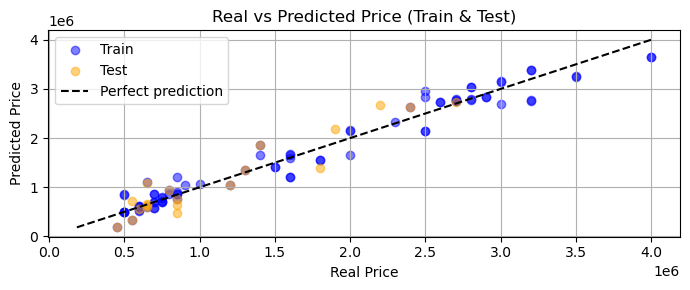

In [18]:
plt.figure(figsize=(7, 3))

plt.scatter(y_train, y_pred_train, alpha=0.5, label='Train', color='blue')
plt.scatter(y_test, y_pred_test, alpha=0.5, label='Test', color='orange')

min_val = min(y_train.min(), y_test.min(), y_pred_train.min(), y_pred_test.min())
max_val = max(y_train.max(), y_test.max(), y_pred_train.max(), y_pred_test.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Perfect prediction')

plt.xlabel("Real Price")
plt.ylabel("Predicted Price")
plt.title("Real vs Predicted Price (Train & Test)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Із графіка видно, що реальні та прогнозовані дані близькі до прямої у=х - ідеального передбачення.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [19]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

In [20]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [21]:
feature_names = X_train_num.columns
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model_scaled.coef_
})

coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print(coef_df_sorted[['Feature', 'Coefficient']])

              Feature    Coefficient
7               Power  496769.214899
16     Brand_Mercedes  210048.781148
10          Brand_BMW  208407.313783
9          Brand_Audi  205600.147769
3           Fuel_Type -183848.018909
13      Brand_Hyundai -152304.863911
14     Brand_Mahindra -140945.162904
5             Mileage -131715.512030
11         Brand_Ford -118209.450311
4        Transmission  116693.768206
15       Brand_Maruti -112259.967020
2   Kilometers_Driven  -94398.721486
19   Brand_Volkswagen  -92968.260065
17         Brand_Tata  -65996.246972
12        Brand_Honda  -62753.005386
20   Owner_Type_Codes   42344.952815
6              Engine  -21377.453338
18       Brand_Toyota   15805.701511
1                Year   -8765.645714
0              Car_ID    5608.685421
8               Seats   -2148.924549


- Найбільший позитивний вплив мають потужність і преміум бренди (Mercedes, BMW, Audi) - це логічно.
- Пробіг і менш престижні бренди зменшують ціну - теж логічно.
- Позитивний вплив трансмісії може пояснюватися перевагою автоматичних коробок передач.
- Деякі коефіцієнти дивні (наприклад, `Year` має негативний вплив), можливо через колінеарність чи особливості датасету.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [22]:
X_train_sm = sm.add_constant(X_train_scaled)

In [23]:
model_sm = sm.OLS(y_train, X_train_sm).fit()

In [24]:
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           2.01e-33
Time:                        15:17:25   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+06   2.74e+04     61.363      0.0

In [25]:
p_values = model_sm.pvalues
significant = p_values[p_values < 0.05].drop('const', errors='ignore')
significant_features = significant.index

print("Статистично значущі ознаки (p < 0.05):")
# for feature in significant_features:
#     print(f"- {feature}")
for i in [4, 5, 6, 8, 10, 11, 12, 14, 15, 16, 17, 20]:
    print(f"x{i} — {X_train_num.columns[i]}")

Статистично значущі ознаки (p < 0.05):
x4 — Transmission
x5 — Mileage
x6 — Engine
x8 — Seats
x10 — Brand_BMW
x11 — Brand_Ford
x12 — Brand_Honda
x14 — Brand_Mahindra
x15 — Brand_Maruti
x16 — Brand_Mercedes
x17 — Brand_Tata
x20 — Owner_Type_Codes


- Вплив статистично значущих ознак підтверджується і коефіцієнтами, і p-значеннями.
- Найсильніший позитивний вплив мають `Transmission`, `Brand_BMW`, `Brand_Mercedes`, `Owner_Type_Codes`.
- Найбільший негативний вплив — `Mileage`, `Engine`.
- Ознаки, які не потрапили до значущих (наприклад, `Power`, `Year`), хоч і мають великі коефіцієнти, можуть бути статистично незначущими, отже їх треба інтерпретувати обережно.

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [26]:
significant_indices = [4, 5, 6, 8, 10, 11, 12, 14, 15, 16, 17, 20]
X_train_signif = X_train_num.iloc[:, significant_indices]

scaler_signif = StandardScaler()
X_train_signif_scaled = scaler_signif.fit_transform(X_train_signif)

In [27]:
X_train_signif_sm = sm.add_constant(X_train_signif_scaled)
model_signif = sm.OLS(y_train, X_train_signif_sm).fit()

In [28]:
print(model_signif.summary())

print(f"Повна модель: R2 = {model_sm.rsquared:.4f}, Adj. R2 = {model_sm.rsquared_adj:.4f}")
print(f"Модель на значущих: R2 = {model_signif.rsquared:.4f}, Adj. R2 = {model_signif.rsquared_adj:.4f}")


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     33.63
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           1.11e-23
Time:                        15:17:25   Log-Likelihood:                -1143.4
No. Observations:                  80   AIC:                             2313.
Df Residuals:                      67   BIC:                             2344.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+06   4.77e+04     35.251      0.0

- Зменшення R2 та Adj. R2 є очікуваним, оскільки ми використали менше ознак. 
- Але R2 = 0.8576, Adj. R2 = 0.8321 - все ще дуже хороші значення.
- Високі значення R2 та Adj. R2 для повної моделі можуть свідчити про overfitting.
- Нова модель зосереджена лише на факторах, які достовірно впливають на ціну, тож вона більш стійка до шуму та краще працюватиме на нових даних.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [29]:
# Фільтруємо p-values з порогом 0.25 (ігноруємо константу)
significant_025 = p_values[p_values < 0.25].drop('const', errors='ignore')

significant_025_indices = [int(s[1:]) for s in significant_025.index]  # x4 -> 4

In [30]:
X_train_025 = X_train_num.iloc[:, significant_025_indices]

In [31]:
scaler_025 = StandardScaler()
X_train_025_scaled = scaler_025.fit_transform(X_train_025)

X_train_025_sm = sm.add_constant(X_train_025_scaled)

In [32]:
model_025 = sm.OLS(y_train, X_train_025_sm).fit()
print(model_025.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     32.47
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           3.65e-24
Time:                        15:17:25   Log-Likelihood:                -1135.3
No. Observations:                  80   AIC:                             2303.
Df Residuals:                      64   BIC:                             2341.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+06    4.4e+04     38.146      0.0

In [33]:
print(f"Повна модель (усі ознаки): R2 = {model_sm.rsquared:.4f}, Adj. R2 = {model_sm.rsquared_adj:.4f}")
print(f"Модель p<0.05: R2 = {model_signif.rsquared:.4f}, Adj. R2 = {model_signif.rsquared_adj:.4f}")
print(f"Модель p<0.25: R2 = {model_025.rsquared:.4f}, Adj. R2 = {model_025.rsquared_adj:.4f}")

Повна модель (усі ознаки): R2 = 0.9586, Adj. R2 = 0.9446
Модель p<0.05: R2 = 0.8576, Adj. R2 = 0.8321
Модель p<0.25: R2 = 0.8839, Adj. R2 = 0.8566


- Модель з p < 0.25 значно покращує R2 та Adj. R2 порівняно з моделлю p < 0.05, але поступається повній.
- Модель p < 0.05 - менш точна, але найнадійніша, добре інтерпретована, рекомендована для бізнес-рішень.
- Водночас, модель p < 0.25 менш схильна до перенавчання, ніж повна модель. Можна сказала, що це баланс між повною моделлю та p < 0.05: точніше, але складніше.